In [ ]:
!pip install tfcausalimpact==0.0.13

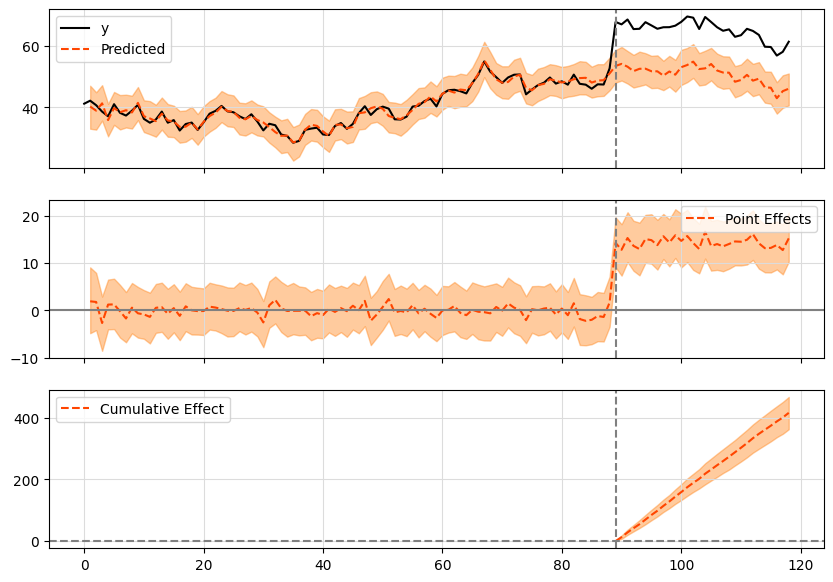

In [8]:
import numpy as np
import pandas as pd
from statsmodels.tsa.arima_process import ArmaProcess
from causalimpact import CausalImpact

# 乱数シードの固定
np.random.seed(1)

# ARMAモデルで共変量x1（気温データ）を生成
ar = np.array([1, -0.99]) #AR(自己回帰)過程のパラメータを定義。この例ではAR(1)過程を指定しており、係数は-0.99。AR(1)過程は現在の値が1時点前の値に依存する関係を表す。
ma = np.array([1]) #MA(移動平均)過程のパラメータを定義。この例ではMA(0)過程、つまり移動平均成分がないことを意味する。
arma_process = ArmaProcess(ar, ma) #ARMA(自己回帰移動平均)過程を定義。この過程は ar と ma のパラメータを使用。
x1 = 20 + arma_process.generate_sample(nsample=120) #ARMA過程を使用して120個のサンプルを生成し、それぞれの値に20を加える。これにより、生成された時系列データ x1 が得られる。

# x1に関連する結果変数yを生成
y = 2 * x1 + np.random.normal(0, 1, 120) #x1の各値を2倍し、標準正規分布（平均0、分散1）から生成されたランダムノイズを加えることで計算
y[90:] += 15 # 91番目以降(キャンペーン開始後1か月間)にキャンペーン効果(+15)を上乗せ

# データを結合
df = pd.DataFrame({'y': y, 'x1': x1})

# キャンペーン前と後の期間を設定
pre_period = [1, 90] # キャンペーン前3か月間
post_period = [91, 119] # キャンペーン後1か月間

# CausalImpactを使用して学習・推定
ci = CausalImpact(df, pre_period, post_period)

#結果の可視化
ci.plot()

In [9]:
#推定結果の要点を出力
print(ci.summary())

Posterior Inference {Causal Impact}
                          Average            Cumulative
Actual                    64.97              1884.2
Prediction (s.d.)         50.63 (0.92)       1468.36 (26.65)
95% CI                    [48.87, 52.47]     [1417.13, 1521.59]

Absolute effect (s.d.)    14.34 (0.92)       415.84 (26.65)
95% CI                    [12.5, 16.11]      [362.61, 467.07]

Relative effect (s.d.)    28.32% (1.81%)     28.32% (1.81%)
95% CI                    [24.7%, 31.81%]    [24.7%, 31.81%]

Posterior tail-area probability p: 0.0
Posterior prob. of a causal effect: 100.0%

For more details run the command: print(impact.summary('report'))
